## Homework, section 3

Load the libraries and dataset

In [120]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [121]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [122]:
features = ['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y']

df = df[features].copy()
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [123]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`
- `tertiary`

In [124]:
df.education.mode()

0    secondary
Name: education, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`

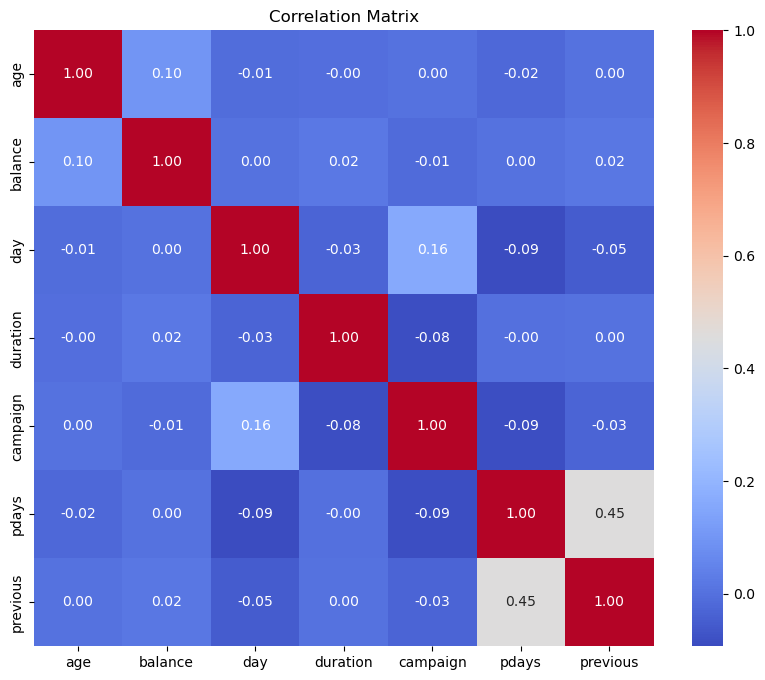

In [125]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical =  ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

corr_mat = df[numerical].corr()

# Plot the correlation matrix as a Seaborn heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The biggest correlation is between `pdays` and `previous`

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [126]:
df.y = (df['y'] == 'yes').astype(int)
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [127]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0



### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [128]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y

del df_train['y']
del df_val['y']
del df_test['y']



### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`

In [129]:
def mis(col):
    return mutual_info_score(col, y_train)

In [132]:
df_train[categorical].apply(mis).sort_values(ascending=False)

poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64

`poutcome` has the highest mutual information with `y`


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9


In [153]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = model.predict(X_val)


original_score = accuracy_score(y_val, y_pred)
np.round(original_score, 2)


np.float64(0.9)

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [163]:
accuracies = []

for f in features[:-1]:
    df_t = df_train.copy()
    df_v = df_val.copy()
    df_t = df_t.drop(f, axis=1)
    df_v =df_v.drop(f, axis=1)

    train_dicts = df_t.to_dict(orient='records')    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dicts = df_v.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    accuracies.append((f, score, abs(score-original_score)))
accuracies

    

[('age', 0.9012386640123866, 0.00011059500110588427),
 ('job', 0.9007962840079629, 0.00033178500331787486),
 ('marital', 0.9013492590134926, 0.00022119000221187957),
 ('education', 0.9010174740101747, 0.0001105950011059953),
 ('balance', 0.9006856890068569, 0.00044238000442387015),
 ('housing', 0.900464499004645, 0.0006635700066357497),
 ('contact', 0.9007962840079629, 0.00033178500331787486),
 ('day', 0.9013492590134926, 0.00022119000221187957),
 ('month', 0.8998009289980093, 0.0013271400132713884),
 ('duration', 0.8897367838973679, 0.011391285113912852),
 ('campaign', 0.8995797389957974, 0.001548330015483379),
 ('pdays', 0.9010174740101747, 0.0001105950011059953),
 ('previous', 0.9011280690112807, 0.0),
 ('poutcome', 0.8931652289316523, 0.007962840079628442)]

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [167]:
values = [0.01, 0.1, 1, 10, 100]

accuracies =  []

for c in values:
    df_t = df_train.copy()
    df_v = df_val.copy()

    train_dicts = df_t.to_dict(orient='records')    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dicts = df_v.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    accuracies.append((c, score, abs(score-original_score)))
accuracies

[(0.01, 0.8975890289758903, 0.003539040035390406),
 (0.1, 0.9009068790090687, 0.0002211900022119906),
 (1, 0.9011280690112807, 0.0),
 (10, 0.8996903339969033, 0.0014377350143773837),
 (100, 0.900575094005751, 0.0005529750055297544)]